<a href="https://colab.research.google.com/github/mhdahime-hadoop/MachineLearning/blob/main/ClusteringAppUberWeek8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prepaired by M H Dahime

In [1]:
!pip install pyspark

In [2]:
# starts the spark only three steps

from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("ClusteringAppWeek8")\
        .enableHiveSupport()\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [3]:
df = spark.read.csv('/content/uber.csv',inferSchema=True, header =True)

In [4]:
df.show(5)

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|5/1/2014 0:02:00|40.7521|-73.9914|B02512|
|5/1/2014 0:06:00|40.6965|-73.9715|B02512|
|5/1/2014 0:15:00|40.7464|-73.9838|B02512|
|5/1/2014 0:17:00|40.7463|-74.0011|B02512|
|5/1/2014 0:17:00|40.7594|-73.9734|B02512|
+----------------+-------+--------+------+
only showing top 5 rows



In [5]:
from pyspark.ml.feature import VectorAssembler
cols = ["Lat", "Lon"]

assembler=VectorAssembler(inputCols=cols, outputCol="features")
featureDf = assembler.transform(df)
featureDf.printSchema()
featureDf.show(10)

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)
 |-- features: vector (nullable = true)

+----------------+-------+--------+------+------------------+
|       Date/Time|    Lat|     Lon|  Base|          features|
+----------------+-------+--------+------+------------------+
|5/1/2014 0:02:00|40.7521|-73.9914|B02512|[40.7521,-73.9914]|
|5/1/2014 0:06:00|40.6965|-73.9715|B02512|[40.6965,-73.9715]|
|5/1/2014 0:15:00|40.7464|-73.9838|B02512|[40.7464,-73.9838]|
|5/1/2014 0:17:00|40.7463|-74.0011|B02512|[40.7463,-74.0011]|
|5/1/2014 0:17:00|40.7594|-73.9734|B02512|[40.7594,-73.9734]|
|5/1/2014 0:20:00|40.7685|-73.8625|B02512|[40.7685,-73.8625]|
|5/1/2014 0:21:00|40.7637|-73.9962|B02512|[40.7637,-73.9962]|
|5/1/2014 0:21:00|40.7252|-74.0023|B02512|[40.7252,-74.0023]|
|5/1/2014 0:25:00|40.7607|-73.9625|B02512|[40.7607,-73.9625]|
|5/1/2014 0:25:00|40.7212|-73.9879|B02512|[40.7212,-73.9879]|
+

In [7]:
featureDf.count()
trainingData, testData = featureDf.randomSplit([0.8, 0.2], seed = 5043)

print("Training Dataset Count: " + str(trainingData.count()))

print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 522195
Test Dataset Count: 130240


In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
cluster_count = [10,30,50,70,90]
for i in cluster_count:
  kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
  kmeansModel = kmeans.fit(trainingData)
  for clusters in kmeansModel.clusterCenters():
    print(clusters)

[ 40.72759601 -74.0001179 ]
[ 40.69531931 -74.17794481]
[ 40.91266266 -73.59769461]
[ 40.78198374 -73.95819726]
[ 40.65486167 -73.78126007]
[ 40.78123152 -73.86947463]
[ 40.68717622 -73.96377339]
[ 40.75592086 -73.98147129]
[ 40.44992805 -74.50470671]
[ 40.80275682 -74.30726686]
[ 40.72479835 -74.00177966]
[ 40.77452691 -73.95668608]
[ 40.7150623  -73.83116251]
[ 40.64645325 -73.78304894]
[ 40.71642472 -73.95424506]
[ 40.69363201 -74.17994394]
[ 40.68261878 -73.93333321]
[ 40.74420228 -73.98778852]
[ 40.73775235 -74.38413699]
[ 40.43827692 -74.52292028]
[ 40.77046554 -73.86823725]
[ 40.68360424 -73.98391908]
[ 40.85018947 -73.04932368]
[ 40.71170634 -74.0122664 ]
[ 41.00499985 -73.75538411]
[ 40.7614327  -73.98786756]
[ 40.87849552 -73.88845465]
[ 40.81414052 -73.94337127]
[ 40.75834744 -73.97288733]
[ 40.74198742 -74.00576731]
[ 40.92423301 -74.06428268]
[ 40.7790792  -73.45331131]
[ 40.72378958 -73.62099138]
[ 40.82644244 -74.18430174]
[ 40.78485579 -73.97669034]
[ 40.7264412  -73.98

In [9]:

  # test the model with test data set
  predictDf = kmeansModel.transform(testData)
  predictDf.show(10)
  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(predictDf)
  print("Silhouette with squared euclidean distance = " + str(silhouette))

+----------------+-------+--------+------+------------------+----------+
|       Date/Time|    Lat|     Lon|  Base|          features|prediction|
+----------------+-------+--------+------+------------------+----------+
|5/1/2014 0:01:00| 40.694|-73.9872|B02598| [40.694,-73.9872]|        29|
|5/1/2014 0:02:00|40.7106|-73.9662|B02598|[40.7106,-73.9662]|        50|
|5/1/2014 0:02:00|40.7487|-74.0035|B02682|[40.7487,-74.0035]|        87|
|5/1/2014 0:02:00|40.7509|-74.0036|B02617|[40.7509,-74.0036]|        87|
|5/1/2014 0:04:00|40.7187|-74.0059|B02617|[40.7187,-74.0059]|         5|
|5/1/2014 0:04:00|40.7313|-73.9747|B02682|[40.7313,-73.9747]|        39|
|5/1/2014 0:04:00|40.7623|-73.9863|B02617|[40.7623,-73.9863]|        11|
|5/1/2014 0:05:00|40.6449| -73.782|B02617| [40.6449,-73.782]|        10|
|5/1/2014 0:05:00|40.6449|-73.7819|B02617|[40.6449,-73.7819]|        10|
|5/1/2014 0:05:00|40.6575|-74.0048|B02598|[40.6575,-74.0048]|        21|
+----------------+-------+--------+------+---------

In [11]:
 predictDf.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|        31| 6426|
|        85|  417|
|        65|  629|
|        53|   14|
|        78|  528|
|        34|  180|
|        81|   24|
|        28| 1400|
|        76| 3995|
|        26|   62|
|        27|   58|
|        44| 4300|
|        12|   15|
|        22|   89|
|        47|   35|
|         1| 4284|
|        52|    5|
|        13|    5|
|         6|  510|
|        86|    4|
+----------+-----+
only showing top 20 rows



In [12]:
pddf_pred = predictDf.toPandas()

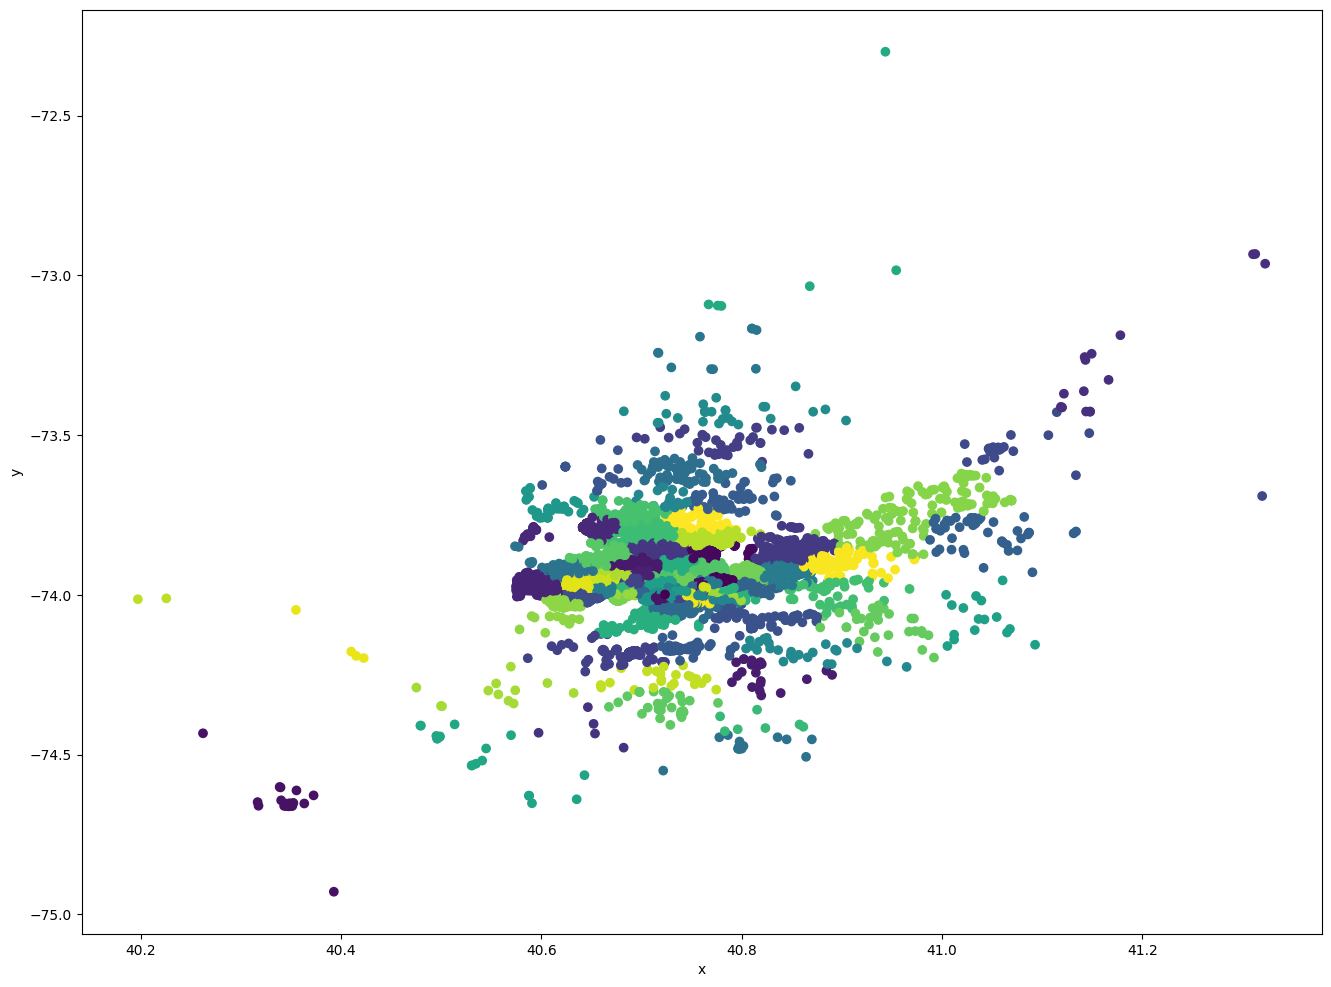

<Figure size 1200x1000 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
pddf_pred = predictDf.toPandas()
pddf_pred.head()
fig = plt.figure(figsize=(16,12))
KmVis= fig.add_subplot(111)
threedee = plt.figure(figsize=(12,10))
KmVis.scatter(pddf_pred.Lat, pddf_pred.Lon,  c=pddf_pred.prediction)
KmVis.set_xlabel('x')
KmVis.set_ylabel('y')

plt.show()

In [14]:
#save model
kmeansModel.write().overwrite().save("uber-model")
kmeansModelLoded = kmeansModel.load("uber-model")

In [16]:
df1 = spark.sparkContext.parallelize([
    ("5/1/2014 0:02:00", 40.7521, -73.9914, "B02512"),
    ("5/1/2014 0:06:00", 40.6965, -73.9715, "B02512"),
    ("5/1/2014 0:15:00", 40.7464, -73.9838, "B02512"),
    ("5/1/2014 0:17:00", 40.7463, -74.0011, "B02512"),
    ("5/1/2014 0:17:00", 40.7594, -73.9734, "B02512")]
  ).toDF(["time", "Lat", "Lon", "base"])
df1.show()

+----------------+-------+--------+------+
|            time|    Lat|     Lon|  base|
+----------------+-------+--------+------+
|5/1/2014 0:02:00|40.7521|-73.9914|B02512|
|5/1/2014 0:06:00|40.6965|-73.9715|B02512|
|5/1/2014 0:15:00|40.7464|-73.9838|B02512|
|5/1/2014 0:17:00|40.7463|-74.0011|B02512|
|5/1/2014 0:17:00|40.7594|-73.9734|B02512|
+----------------+-------+--------+------+



In [17]:
df2 = assembler.transform(df1)
df2.show()

+----------------+-------+--------+------+------------------+
|            time|    Lat|     Lon|  base|          features|
+----------------+-------+--------+------+------------------+
|5/1/2014 0:02:00|40.7521|-73.9914|B02512|[40.7521,-73.9914]|
|5/1/2014 0:06:00|40.6965|-73.9715|B02512|[40.6965,-73.9715]|
|5/1/2014 0:15:00|40.7464|-73.9838|B02512|[40.7464,-73.9838]|
|5/1/2014 0:17:00|40.7463|-74.0011|B02512|[40.7463,-74.0011]|
|5/1/2014 0:17:00|40.7594|-73.9734|B02512|[40.7594,-73.9734]|
+----------------+-------+--------+------+------------------+



In [18]:
# prediction of sample data set with loaded model
df3 = kmeansModelLoded.transform(df2)
df3.show()

+----------------+-------+--------+------+------------------+----------+
|            time|    Lat|     Lon|  base|          features|prediction|
+----------------+-------+--------+------+------------------+----------+
|5/1/2014 0:02:00|40.7521|-73.9914|B02512|[40.7521,-73.9914]|        84|
|5/1/2014 0:06:00|40.6965|-73.9715|B02512|[40.6965,-73.9715]|        18|
|5/1/2014 0:15:00|40.7464|-73.9838|B02512|[40.7464,-73.9838]|        49|
|5/1/2014 0:17:00|40.7463|-74.0011|B02512|[40.7463,-74.0011]|        87|
|5/1/2014 0:17:00|40.7594|-73.9734|B02512|[40.7594,-73.9734]|         3|
+----------------+-------+--------+------+------------------+----------+

